In [1]:
import numpy as np
import torch
import torch.nn as nn
import seaborn as sns
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_squared_error

In [2]:
x = np.arange(0, 1.5+0.004, 0.004)

In [3]:
first_x1 = np.sqrt(2*0.3*x)
first_x2 = -np.sqrt(2*0.3*x)
y1 = np.concatenate((first_x1, first_x2))
x1 = np.concatenate((x,x))

In [4]:
second_x1 = np.sqrt(2*0.5*x)
second_x2 = -np.sqrt(2*0.5*x)
y2 = np.concatenate((second_x1, second_x2))
x2 = np.concatenate((x,x)) - 0.4

In [5]:
third_x1 = np.sqrt(2*x)
third_x2 = -np.sqrt(2*x)
y3 = np.concatenate((third_x1, third_x2))
x3 = np.concatenate((x,x)) - 0.8

<AxesSubplot:>

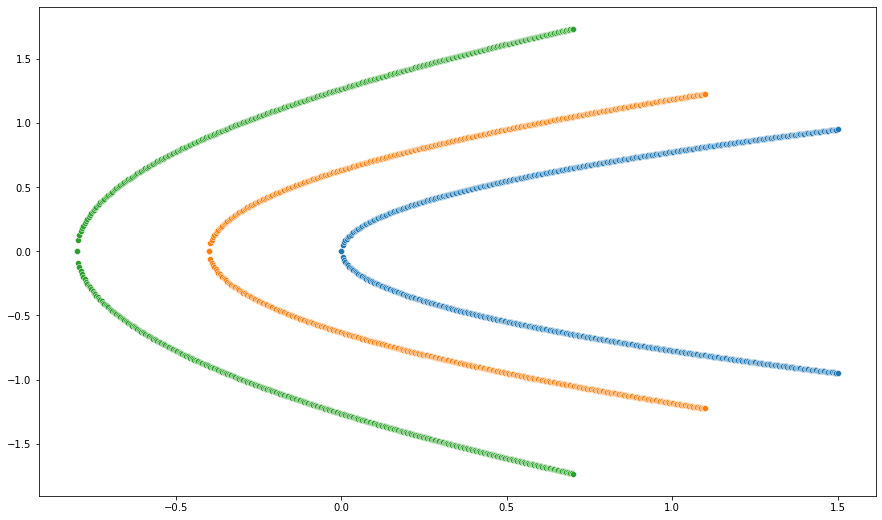

In [6]:
plt.figure(figsize=(15,9))
sns.scatterplot(x=x1, y=y1)
sns.scatterplot(x=x2, y=y2)
sns.scatterplot(x=x3, y=y3)

<AxesSubplot:>

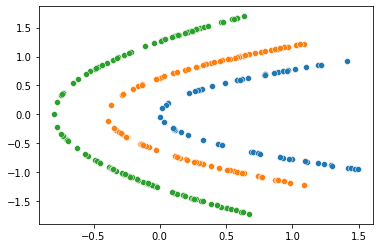

In [7]:
a = np.array(list(zip(x1, y1)))
ind = np.arange(0, len(a))
rind = np.random.choice(ind, 60)
x1_ = a[rind][:,0]
y1_ = a[rind][:,1]
sns.scatterplot(x=x1_, y=y1_)


a = np.array(list(zip(x2, y2)))
ind = np.arange(0, len(a))
rind = np.random.choice(ind, 100)
x2_ = a[rind][:,0]
y2_ = a[rind][:,1]
sns.scatterplot(x=x2_, y=y2_)


a = np.array(list(zip(x3, y3)))
ind = np.arange(0, len(a))
rind = np.random.choice(ind, 120)
x3_ = a[rind][:,0]
y3_ = a[rind][:,1]
sns.scatterplot(x=x3_, y=y3_)

In [8]:
q1 = np.array(list(zip(x1_, y1_)))
q2 = np.array(list(zip(x2_, y2_)))
q3 = np.array(list(zip(x3_, y3_)))

In [9]:
X = np.concatenate((q1, q2, q3))
Y = np.array([0]*60 + [1]*100 + [2]*120).reshape(-1,1)

In [10]:
X.shape

(280, 2)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42, test_size=0.2)

<AxesSubplot:>

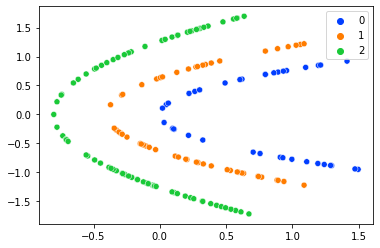

In [12]:
sns.scatterplot(x=X_train[:,0], y=X_train[:,1], hue=y_train.ravel(), palette='bright')

<AxesSubplot:>

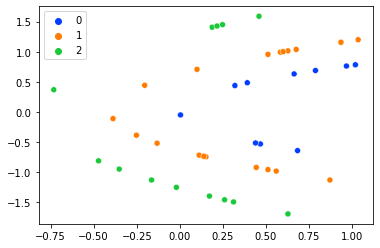

In [13]:
sns.scatterplot(x=X_val[:,0], y=X_val[:,1], hue=y_val.ravel(), palette='bright')

<AxesSubplot:>

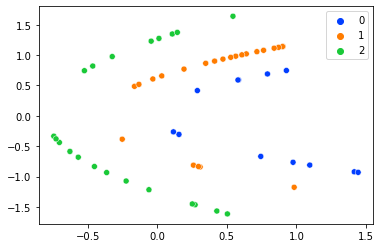

In [14]:
sns.scatterplot(x=X_test[:,0], y=X_test[:,1], hue=y_test.ravel(), palette='bright')

In [15]:
y_train.ravel()

array([2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 0, 2, 2,
       1, 2, 0, 0, 1, 2, 1, 0, 2, 0, 0, 2, 2, 0, 2, 2, 1, 1, 2, 2, 1, 2,
       2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 0,
       2, 2, 2, 0, 0, 0, 2, 1, 2, 2, 0, 1, 1, 0, 1, 2, 1, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 0, 0, 2, 1, 1, 1, 1, 2, 1, 0, 2, 0,
       1, 1, 1, 2, 1, 0, 1, 2, 2, 1, 2, 0, 0, 2, 0, 2, 1, 2, 1, 1, 0, 1,
       2, 2, 2, 2, 2, 1, 2, 2, 0, 1, 2, 2, 1, 2, 0, 2, 1, 0, 1, 2, 0, 0,
       1, 0, 1, 1, 1, 0, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2,
       0, 1, 0])

In [16]:
batch_size = 1
train_in_dataset = torch.utils.data.TensorDataset(torch.tensor(X_train.astype(np.float32)), 
                                                  torch.tensor(y_train.ravel().astype(np.int64)))

valid_in_dataset = torch.utils.data.TensorDataset(torch.tensor(X_val.astype(np.float32)), 
                                                  torch.tensor(y_val.ravel().astype(np.int64)))

test_in_dataset = torch.utils.data.TensorDataset(torch.tensor(X_test.astype(np.float32)), 
                                                  torch.tensor(y_test.ravel().astype(np.int64)))

In [17]:
train_loader = torch.utils.data.DataLoader(train_in_dataset,
                                          batch_size=batch_size, shuffle=False)
val_loader = torch.utils.data.DataLoader(valid_in_dataset,
                                          batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_in_dataset,
                                          batch_size=batch_size, shuffle=False)

In [18]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 20)
        self.fc2 = nn.Linear(20, 3)
        
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x

In [19]:
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=2, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=3, bias=True)
)


In [20]:
learning_rate = 0.05
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
criterion = nn.CrossEntropyLoss()

In [21]:
loss = nn.CrossEntropyLoss()

In [22]:
inputs = torch.randn(3,5)
inputs

tensor([[-0.0452,  0.8319,  1.0431, -1.6164, -0.2759],
        [ 1.7514,  2.9728,  0.1351,  0.7311,  0.0232],
        [ 0.5902,  0.8316, -0.1433, -0.3287,  1.3088]])

In [23]:
target = torch.empty(3, dtype=torch.long).random_(5)
target

tensor([4, 3, 4])

In [24]:
loss(inputs, target)

tensor(1.9382)

In [25]:
def train(model, optimizer, loss_fn, metric, train_loader, val_loader, epochs=20, device="cpu", log_step=5):
    for epoch in range(1, epochs+1):
        training_loss = 0.0
        valid_loss = 0.0
        model.train()
        for batch in train_loader:
            optimizer.zero_grad()
            inputs, targets = batch
            inputs = inputs.to(device)
            targets = targets.to(device)
#             print(inputs)
            output = model(inputs)
            loss = loss_fn(output, targets)
            loss.backward()
            optimizer.step()
            training_loss += loss.data.item() * inputs.size(0)
        training_loss /= len(train_loader.dataset)
        
        model.eval()
        num_correct = 0 
        num_examples = 0
        preds = np.array([])
        actual = np.array([])
        for batch in val_loader:
            inputs, targets = batch
            inputs = inputs.to(device)
            output = model(inputs)
            targets = targets.to(device)
            loss = loss_fn(output, targets) 
            valid_loss += loss.data.item() * inputs.size(0)
            if (metric == 'acc') | (metric == 'accuracy'):
                correct = torch.eq(torch.max(F.softmax(output, dim=1), dim=1)[1], targets)
                num_correct += torch.sum(correct).item()
                num_examples += correct.shape[0]
            else:
                preds = np.append(preds, output.ravel().data.detach().numpy())
                actual = np.append(actual, targets.ravel().data.detach().numpy())
        valid_loss /= len(val_loader.dataset)

        if epoch % log_step == 0:
            if (metric == 'acc') | (metric == 'accuracy'): 
                print('Epoch: {}, Training Loss: {:.4f}, Validation Loss: {:.4f}, accuracy = {:.3f}'.format(
                    epoch, training_loss, valid_loss, num_correct / num_examples))
            else:
                print('Epoch: {}, Training Loss: {:.4f}, Validation Loss: {:.4f}, mse = {:.7f}'.format(
                    epoch, training_loss, valid_loss, mean_squared_error(actual, preds)))

In [26]:
train(net, optimizer, criterion, 'acc',
      train_loader, val_loader, epochs=200)

Epoch: 5, Training Loss: 0.0222, Validation Loss: 0.0217, accuracy = 1.000
Epoch: 10, Training Loss: 0.0073, Validation Loss: 0.0076, accuracy = 1.000
Epoch: 15, Training Loss: 0.0041, Validation Loss: 0.0045, accuracy = 1.000
Epoch: 20, Training Loss: 0.0028, Validation Loss: 0.0031, accuracy = 1.000
Epoch: 25, Training Loss: 0.0021, Validation Loss: 0.0024, accuracy = 1.000
Epoch: 30, Training Loss: 0.0017, Validation Loss: 0.0019, accuracy = 1.000
Epoch: 35, Training Loss: 0.0014, Validation Loss: 0.0016, accuracy = 1.000
Epoch: 40, Training Loss: 0.0012, Validation Loss: 0.0014, accuracy = 1.000
Epoch: 45, Training Loss: 0.0011, Validation Loss: 0.0012, accuracy = 1.000
Epoch: 50, Training Loss: 0.0009, Validation Loss: 0.0011, accuracy = 1.000
Epoch: 55, Training Loss: 0.0008, Validation Loss: 0.0010, accuracy = 1.000
Epoch: 60, Training Loss: 0.0008, Validation Loss: 0.0009, accuracy = 1.000
Epoch: 65, Training Loss: 0.0007, Validation Loss: 0.0008, accuracy = 1.000
Epoch: 70, Tr

In [27]:
from matplotlib.colors import ListedColormap

def plot_mesh(X, y, model):
    plt.figure(figsize=(15,9))
    colors = ['violet', 'lightgreen', 'crimson']
    cmap = ListedColormap(sns.color_palette(colors))
    
    x1_min, x1_max = X[:, 0].min()-1.5, X[:, 0].max()+1.5
    x2_min, x2_max = X[:, 1].min()-1.5, X[:, 1].max()+1.5
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.005),
                           np.arange(x1_min, x1_max, 0.005))
    
    in_model = torch.tensor(np.array([xx1.ravel(), xx2.ravel()]).T).float()
    Z = model(in_model)
    output = torch.max(F.softmax(Z, dim=1), dim=1)[1]
    plt.contourf(xx1, xx2, output.reshape(xx2.shape), cmap=cmap)
    
    plt.scatter(X[y==0,0],X[y==0,1], s=80, cmap=cmap, c=colors[0], edgecolors='black')
    plt.scatter(X[y==1,0],X[y==1,1], s=80, cmap=cmap, c=colors[1], edgecolors='black')
    plt.scatter(X[y==2,0],X[y==2,1], s=80, cmap=cmap, c=colors[2], edgecolors='black')

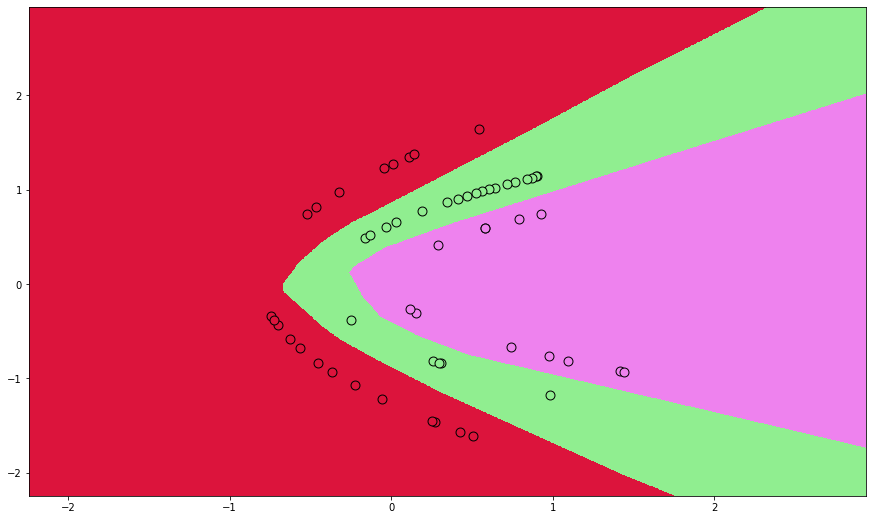

In [28]:
plot_mesh(X_test, y_test.ravel(), net)

In [29]:
def fx(t):
    return np.sin(t*t-5*t+6)

<AxesSubplot:>

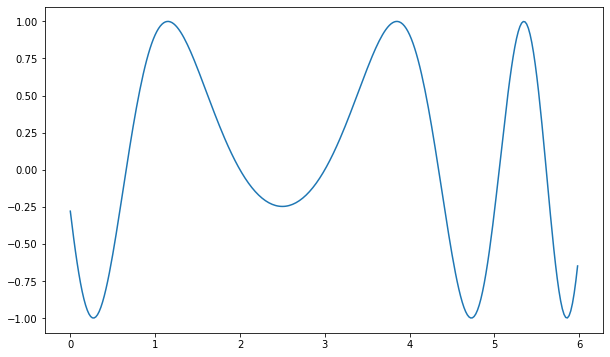

In [30]:
t = np.arange(0, 6, 0.02)
FX = fx(t)
plt.figure(figsize=(10,6))
sns.lineplot(x=t, y=FX)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(t, FX, test_size=0.5, random_state=42)

<AxesSubplot:>

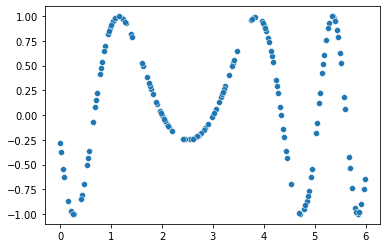

In [32]:
sns.scatterplot(x=X_train, y=y_train)

In [33]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [34]:
batch_size = 48
train_in_dataset = torch.utils.data.TensorDataset(torch.tensor(X_train.astype(np.float32)), 
                                                  torch.tensor(y_train.astype(np.float32)))

valid_in_dataset = torch.utils.data.TensorDataset(torch.tensor(X_val.astype(np.float32)), 
                                                  torch.tensor(y_val.astype(np.float32)))

test_in_dataset = torch.utils.data.TensorDataset(torch.tensor(X_test.astype(np.float32)), 
                                                  torch.tensor(y_test.astype(np.float32)))

In [35]:
train_loader = torch.utils.data.DataLoader(train_in_dataset,
                                          batch_size=batch_size, shuffle=False)
val_loader = torch.utils.data.DataLoader(valid_in_dataset,
                                          batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_in_dataset,
                                          batch_size=batch_size, shuffle=False)

In [36]:
for batch in train_loader:
    data, target = batch
    print(data)
    print(target)
    break

tensor([[5.3800],
        [2.1400],
        [4.4600],
        [3.1600],
        [5.6000],
        [4.9200],
        [4.4400],
        [1.3000],
        [3.9600],
        [1.7000],
        [4.2600],
        [3.1800],
        [0.2400],
        [0.7000],
        [0.5600],
        [2.8400],
        [5.6800],
        [5.0800],
        [3.4000],
        [1.0200],
        [1.9000],
        [4.1600],
        [4.9400],
        [0.8200],
        [1.7800],
        [4.8800],
        [2.7200],
        [0.5200],
        [5.8600],
        [2.8200],
        [4.0000],
        [0.0000],
        [5.3600],
        [5.4400],
        [2.0000],
        [5.1800],
        [5.1000],
        [3.4200],
        [1.9600],
        [0.7200],
        [1.2200],
        [3.0000],
        [4.7200],
        [4.0400],
        [4.8400],
        [0.2200],
        [5.9200],
        [5.3400]])
tensor([[ 0.9819],
        [-0.1201],
        [-0.4350],
        [ 0.1845],
        [ 0.0647],
        [-0.6263],
        [-0.3635],
  

In [37]:
class Network(nn.Module):
    
    def __init__(self):
        super(Network, self).__init__()
        self.fc1 = nn.Linear(1, 20)
        self.fc2 = nn.Linear(20, 20)
        self.fc3 = nn.Linear(20, 1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = torch.sigmoid(x)
        x = self.fc2(x)
        x = torch.sigmoid(x)
        x = self.fc3(x)
        return x

## SGD

In [38]:
net = Network()
print(net)

Network(
  (fc1): Linear(in_features=1, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=1, bias=True)
)


In [39]:
# optimizer = optim.Adadelta(net.parameters(), lr=0.9)
optimizer = optim.SGD(net.parameters(), lr=0.05, momentum=0.9)
# optimizer = optim.RMSprop(net.parameters(), lr=0.005, momentum=0.5)
# optimizer = optim.Adam(net.parameters(), lr=0.05)
criterion = nn.MSELoss()

In [40]:
train(net, optimizer, criterion, 'mse',
      train_loader, test_loader, epochs=10000, log_step=100)

Epoch: 100, Training Loss: 0.3475, Validation Loss: 0.3577, mse = 0.3576811
Epoch: 200, Training Loss: 0.3195, Validation Loss: 0.3239, mse = 0.3239413
Epoch: 300, Training Loss: 0.3036, Validation Loss: 0.3103, mse = 0.3102831
Epoch: 400, Training Loss: 0.2769, Validation Loss: 0.2891, mse = 0.2890785
Epoch: 500, Training Loss: 0.2613, Validation Loss: 0.2777, mse = 0.2777085
Epoch: 600, Training Loss: 0.2588, Validation Loss: 0.2763, mse = 0.2762964
Epoch: 700, Training Loss: 0.2574, Validation Loss: 0.2748, mse = 0.2748396
Epoch: 800, Training Loss: 0.2552, Validation Loss: 0.2718, mse = 0.2718366
Epoch: 900, Training Loss: 0.2508, Validation Loss: 0.2656, mse = 0.2656056
Epoch: 1000, Training Loss: 0.2435, Validation Loss: 0.2551, mse = 0.2550626
Epoch: 1100, Training Loss: 0.2338, Validation Loss: 0.2419, mse = 0.2419450
Epoch: 1200, Training Loss: 0.2240, Validation Loss: 0.2304, mse = 0.2304109
Epoch: 1300, Training Loss: 0.2156, Validation Loss: 0.2215, mse = 0.2215471
Epoch: 1

In [41]:
res = []
for i in t:
    output = net(torch.tensor([i]).float())
    res.append(output.data.detach().numpy()[0])

In [42]:
output.data.detach().numpy()[0]

-1.0253141

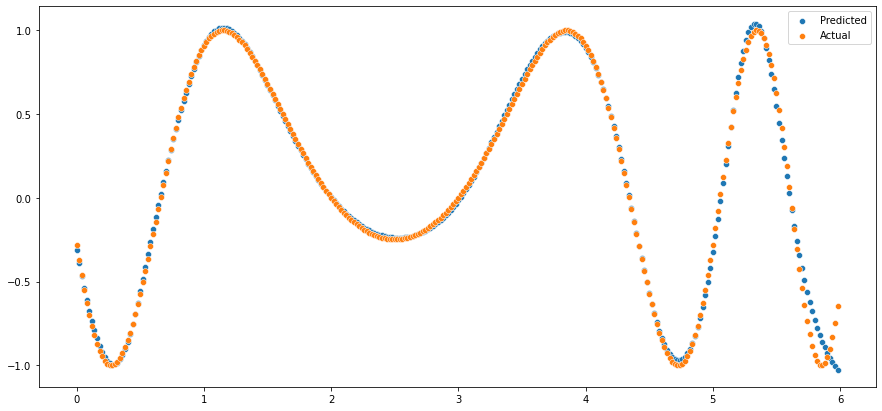

In [43]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=t, y=res, label='Predicted')
sns.scatterplot(x=t, y=FX, label='Actual')
plt.legend()

In [44]:
mean_squared_error(FX, res)

0.002156049828739752

## Adam

In [45]:
net = Network()
print(net)

Network(
  (fc1): Linear(in_features=1, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=1, bias=True)
)


In [46]:
optimizer = optim.Adam(net.parameters(), lr=0.05)

In [47]:
train(net, optimizer, criterion, 'mse',
      train_loader, test_loader, epochs=10000, log_step=100)

Epoch: 100, Training Loss: 0.2458, Validation Loss: 0.2598, mse = 0.2597634
Epoch: 200, Training Loss: 0.1626, Validation Loss: 0.1408, mse = 0.1408473
Epoch: 300, Training Loss: 0.1357, Validation Loss: 0.0934, mse = 0.0934064
Epoch: 400, Training Loss: 0.0720, Validation Loss: 0.0435, mse = 0.0434578
Epoch: 500, Training Loss: 0.0068, Validation Loss: 0.0036, mse = 0.0036015
Epoch: 600, Training Loss: 0.0186, Validation Loss: 0.0070, mse = 0.0069632
Epoch: 700, Training Loss: 0.0040, Validation Loss: 0.0021, mse = 0.0020749
Epoch: 800, Training Loss: 0.0415, Validation Loss: 0.0805, mse = 0.0804920
Epoch: 900, Training Loss: 0.0025, Validation Loss: 0.0016, mse = 0.0015624
Epoch: 1000, Training Loss: 0.0091, Validation Loss: 0.0105, mse = 0.0104803
Epoch: 1100, Training Loss: 0.0022, Validation Loss: 0.0011, mse = 0.0011079
Epoch: 1200, Training Loss: 0.0249, Validation Loss: 0.0149, mse = 0.0148956
Epoch: 1300, Training Loss: 0.0042, Validation Loss: 0.0046, mse = 0.0045939
Epoch: 1

In [48]:
res = []
for i in t:
    output = net(torch.tensor([i]).float())
    res.append(output.data.detach().numpy()[0])

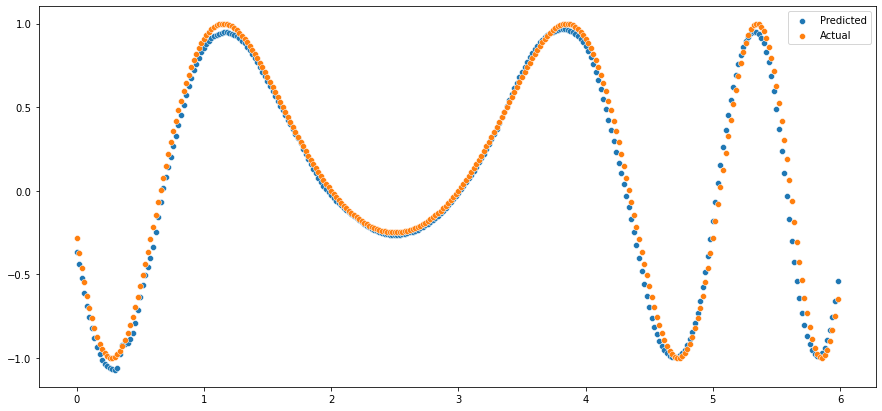

In [49]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=t, y=res, label='Predicted')
sns.scatterplot(x=t, y=FX, label='Actual')
plt.legend()

### Debug

In [83]:
def train(model, optimizer, loss_fn, metric, train_loader, val_loader, epochs=20, device="cpu", log_step=5):
    for epoch in range(1, epochs+1):
        training_loss = 0.0
        valid_loss = 0.0
        model.train()
        for batch in train_loader:
            optimizer.zero_grad()
            inputs, targets = batch
            inputs = inputs.to(device)
            targets = targets.to(device)
#             print(inputs)
            
            def closure():
#                 if torch.is_grad_enabled():
                optimizer.zero_grad()
                output = model(inputs)
                loss = loss_fn(output, targets)
#                 if loss.requires_grad:
                loss.backward()
                return loss
            loss = closure()
            optimizer.step(closure)
            training_loss += loss.data.item() * inputs.size(0)
        training_loss /= len(train_loader.dataset)
        
        model.eval()
        num_correct = 0 
        num_examples = 0
        preds = np.array([])
        actual = np.array([])
        for batch in val_loader:
            inputs, targets = batch
            inputs = inputs.to(device)
            output = model(inputs)
            targets = targets.to(device)
            loss = loss_fn(output, targets) 
            valid_loss += loss.data.item() * inputs.size(0)
            if (metric == 'acc') | (metric == 'accuracy'):
                correct = torch.eq(torch.max(F.softmax(output, dim=1), dim=1)[1], targets)
                num_correct += torch.sum(correct).item()
                num_examples += correct.shape[0]
            else:
                preds = np.append(preds, output.ravel().data.detach().numpy())
                actual = np.append(actual, targets.ravel().data.detach().numpy())
        valid_loss /= len(val_loader.dataset)

        if epoch % log_step == 0:
            if (metric == 'acc') | (metric == 'accuracy'): 
                print('Epoch: {}, Training Loss: {:.4f}, Validation Loss: {:.4f}, accuracy = {:.3f}'.format(
                    epoch, training_loss, valid_loss, num_correct / num_examples))
            else:
                print('Epoch: {}, Training Loss: {:.4f}, Validation Loss: {:.4f}, mse = {:.7f}'.format(
                    epoch, training_loss, valid_loss, mean_squared_error(actual, preds)))

In [91]:
optimizer = optim.LBFGS(net.parameters(), history_size=10, lr=0.01)

In [92]:
train(net, optimizer, criterion, 'mse',
      train_loader, test_loader, epochs=10000, log_step=100)

Epoch: 100, Training Loss: 0.3868, Validation Loss: 0.4111, mse = 0.4110657
Epoch: 200, Training Loss: 0.3868, Validation Loss: 0.4111, mse = 0.4110657
Epoch: 300, Training Loss: 0.3868, Validation Loss: 0.4111, mse = 0.4110657
Epoch: 400, Training Loss: 0.3868, Validation Loss: 0.4111, mse = 0.4110656
Epoch: 500, Training Loss: 0.3868, Validation Loss: 0.4111, mse = 0.4110656
Epoch: 600, Training Loss: 0.3868, Validation Loss: 0.4111, mse = 0.4110656


KeyboardInterrupt: 